# COGS 108 - Final Project 

## Permissions

Place an `X` in the appropriate bracket below to specify if you would like your group's project to be made available to the public. (Note that PIDs will be scraped from the public submission, but student names will be included.)

* [ X ] YES - make available
* [  ] NO - keep private

# Overview

*Fill in your overview here*

# Names

- Aditya Mehta
- Sumanth Billa
- Yukti Vijay
- Chinmay Joshi

# Group Members IDs

- A16062688
- A14988215
- A16119609
- A12732969

# Research Question

Is there a correlation between the price of wine and its corresponding WineEnthusiast score?

## Background and Prior Work

   One of our family members works for one of the largest wine manufacturers in the US, and we’ve all noticed over that there are different shelves at stores with stark differences in price. The higher shelves generally had the most expensive and “high quality wines” while the lower shelves included the cheaper and “lower quality wines”. Not being wine enthusiasts ourselves, we thought about why the price for some of the top shelf wines was much higher than the ones on the bottom shelves. Then we asked the question: does the higher priced wine actually tastes better than the cheaper wine?
	
   While doing our background research we found a few articles and studies that have explored the question we posed. In a study done by the American Association of Wine Enthusiasts, the researchers posed the question “Does More Expensive Wine Taste Better?” and used a series of blind tastings to collect their observations. Using a sample pool of more than 6000 blind taste tests, they found that the correlation between price and overall rating is small and negative, which suggested that the individuals enjoyed the more expensive wines slightly less. Their results in the study indicated that the prices of wines and recommendations of wines by experts may not be a good guide for non-expert wine consumers.[1] Another study we looked at was a study done by a Caltech professor in which he had volunteers sampled several different wines that were labeled with increasing prices. However, the prices were labeled inaccurately and the taster’s brain was observed using an MRI. When tasting the same wine twice but with different price tags, the portion of the brain that encodes the experienced pleasantness of an experience reflected an increase in activity when tasting the wine with the higher price tag. This study goes to show that the perception of a wine’s quality affects the way in which the brain processes the experience of the tasting.[2]

References (include links):
- 1) https://moneydotcomvip.files.wordpress.com/2015/05/aawe_wp16.pdf
- 2) https://www.caltech.edu/about/news/wine-study-shows-price-influences-perception-1374

# Hypothesis


We believe a more expensive wine does not always correlate to a high WineEnthusiast score. For example, an eighteen thousand dollar bottle of wine from a well-known winery may have a lower score than a twenty dollar bottle of wine from Vons.

# Dataset(s)

*The dataset we obtained is from WineMag, known as Wine Enthusiast Magazine. This dataset is split up into two portions as the datasets are quite large. The first dataset contains around the first 150,000 wine reviews, while the second dataset contains the next 130,000 (approximately).*

- Dataset Name: winemag-data_first150k.csv
- Link to the dataset: https://raw.githubusercontent.com/COGS108/group085_wi20/master/wine-reviews/winemag-data_first150k.csv?token=AL3E7GXSTCCMXRTCQXTHUFS6PORBM
- Number of observations: 150930 observations


- Dataset Name: winemag-data-130k-v2.csv
- Link to the dataset: https://raw.githubusercontent.com/COGS108/group085_wi20/master/wine-reviews/winemag-data-130k-v2.csv?token=AL3E7GQN6ESJMRSSGLS7UJK6PORDO
- Number of observations: 129971 observations

Each of these datasets contains the reviews made by people who sampled a bottle of wine and gave it a score out of 100. The dataset contains the following elements:

| Column name | Column description|
|------|------|
|   country  | The country that the wine was made in.|
|description| A description of the flavor and aromas of the wine.|
|designation| The name of that particular wine bottle (given by winery).|
|points| The score given to this wine by the reviewer.|
|price| The price per bottle of the sampled wine.|
|province|The province of a country that the wine was made in.|
|region_1| The region within the province that the wine was made in.|
|region_2| Another designation for the region of manufacturing.|
|taster_name|The name of the person generating the review.|
|taster_twitter_handle|The twitter handle of the person tasting and reviewing (if applicable).|
|title|The official name of the wine including its manufacturing year.|
|variety|The catagory of specialty wine that the wine falls under.|
|winery|The name of the winery that manufactured this wine.|


# Setup

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import metrics
from sklearn.model_selection import train_test_split
from matplotlib import pyplot
import random
import matplotlib.pyplot as plt
%matplotlib inline


# Data Cleaning

### Load the data

Load the data from the given URLs and assign the datasets to DataFrames using Pandas.

In [8]:
url_1 = 'https://raw.githubusercontent.com/COGS108/group085_wi20/master/wine-reviews/winemag-data_first150k.csv?token=AL3E7GXSTCCMXRTCQXTHUFS6PORBM'
url_2 = 'https://raw.githubusercontent.com/COGS108/group085_wi20/master/wine-reviews/winemag-data-130k-v2.csv?token=AL3E7GQN6ESJMRSSGLS7UJK6PORDO'
df150k = pd.read_csv(url_1)
dfV2 = pd.read_csv(url_2)

### Merge Dataframes

Drop the columns that are deemed unneccessary for the data analysis of the project and concatanate the two dataframes into one singular dataframe. Drop missing or null values from the dataframe.

In [9]:
#merging 150k and V2
df = df150k.append(dfV2, ignore_index=True, sort=False)

#dropping unneeded colums
df = df.drop(['taster_name', 'title', 'description', 'designation', 'region_1', 'region_2'], axis=1)
df = df.drop(df.columns[0], axis=1)

#drop rows that cointain missing values
df = df.dropna(subset=['price', 'variety', 'country'])

#convert twitter handle to boolean on whether data is from Twitter
df['taster_twitter_handle'] = np.where(df['taster_twitter_handle'].isnull(), False, True)

#rename poorly named columns
df = df.rename({'points': 'score', 'taster_twitter_handle': 'from Twitter?'}, axis=1)

df

,country,score,price,province,variety,winery,from Twitter?
0,US,96,235.0,California,Cabernet Sauvignon,Heitz,False
1,Spain,96,110.0,Northern Spain,Tinta de Toro,Bodega Carmen Rodríguez,False
2,US,96,90.0,California,Sauvignon Blanc,Macauley,False
3,US,96,65.0,Oregon,Pinot Noir,Ponzi,False
4,France,95,66.0,Provence,Provence red blend,Domaine de la Bégude,False
...,...,...,...,...,...,...,...
280896,Germany,90,28.0,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),False
280897,US,90,75.0,Oregon,Pinot Noir,Citation,True
280898,France,90,30.0,Alsace,Gewürztraminer,Domaine Gresser,True
280899,France,90,32.0,Alsace,Pinot Gris,Domaine Marcel Deiss,True


### Standardize the data

First standardize the variety of the wines into 15 of the most prominent wine types. This allows for easier catagorization of the wine variety.

In [10]:
#standardize variety column into 15 main wine types
def standardize_variety(ch):
    
    ch = str(ch)
    ch = ch.lower()
    ch = ch.strip()
   
    if "chardonnay" in ch:
        return 'Chardonnay'
    elif 'riesling' in ch:
        return 'Riesling'
    elif 'pinot' in ch and 'grigio' in ch:
        return 'Pinot Grigio'
    elif 'sauvignon' in ch and 'blanc' in ch:
        return 'Sauvignon Blanc'
    elif 'sauvignon' in ch and 'cabernet' in ch:
        return 'Cabernet Sauvignon'
    elif 'pinot' in ch and 'noir' in ch:
        return 'Pinot Noir'
    elif 'syrah' in ch:
        return 'Syrah'
    elif 'zinfandel' in ch:
        return 'Zinfandel'
    elif 'malbec' in ch:
        return 'Malbec'
    elif 'merlot' in ch:
        return 'Merlot'
    elif 'red' in ch:
        return 'Red Blend'
    elif 'white' in ch:
        return 'White Blend'
    elif 'sparkling' in ch:
        return 'Sparkling Blend'
    elif 'rosé' in ch:
        return 'Rosé'
    else:
        return 'Mixed Blend'

df['variety'] = df['variety'].apply(standardize_variety)

Next the score is standardized. It is evident from the reviews that the distribution of scores is generally high. The standardization of scores between 80 and 100 is done because there are no scores below 80, and no scores above 100.

In [11]:
#standardize score from 80-100 to floats of 1.0-10.0
def standardize_score(ch):
  return 1+(((ch-80)/20)*9)

df['scaled_score'] = df['score'].apply(standardize_score)
df

,country,score,price,province,variety,winery,from Twitter?,scaled_score
0,US,96,235.0,California,Cabernet Sauvignon,Heitz,False,8.20
1,Spain,96,110.0,Northern Spain,Mixed Blend,Bodega Carmen Rodríguez,False,8.20
2,US,96,90.0,California,Sauvignon Blanc,Macauley,False,8.20
3,US,96,65.0,Oregon,Pinot Noir,Ponzi,False,8.20
4,France,95,66.0,Provence,Red Blend,Domaine de la Bégude,False,7.75
...,...,...,...,...,...,...,...,...
280896,Germany,90,28.0,Mosel,Riesling,Dr. H. Thanisch (Erben Müller-Burggraef),False,5.50
280897,US,90,75.0,Oregon,Pinot Noir,Citation,True,5.50
280898,France,90,30.0,Alsace,Mixed Blend,Domaine Gresser,True,5.50
280899,France,90,32.0,Alsace,Mixed Blend,Domaine Marcel Deiss,True,5.50


#### Plot the raw cleaned data

This gives a quick glance at how price and score from the review compare.

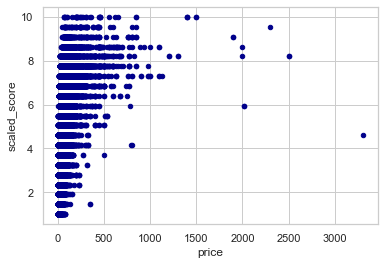

In [12]:
graph1 = df.plot.scatter(x='price', y='scaled_score', c='DarkBlue')

# Data Analysis & Results

Include cells that describe the steps in your data analysis.

## Visualizing the data

Compile data and prepare for visualization

In [13]:
countries = df.country.unique()
countries_mean_scores = df.groupby('country')['scaled_score'].mean()
countries_mean_price = df.groupby('country')['price'].mean()
countries_data = pd.concat([countries_mean_scores, countries_mean_price], axis = 1, join='inner')
countries_data = countries_data.reset_index()

#### Average Scaled Score By Country

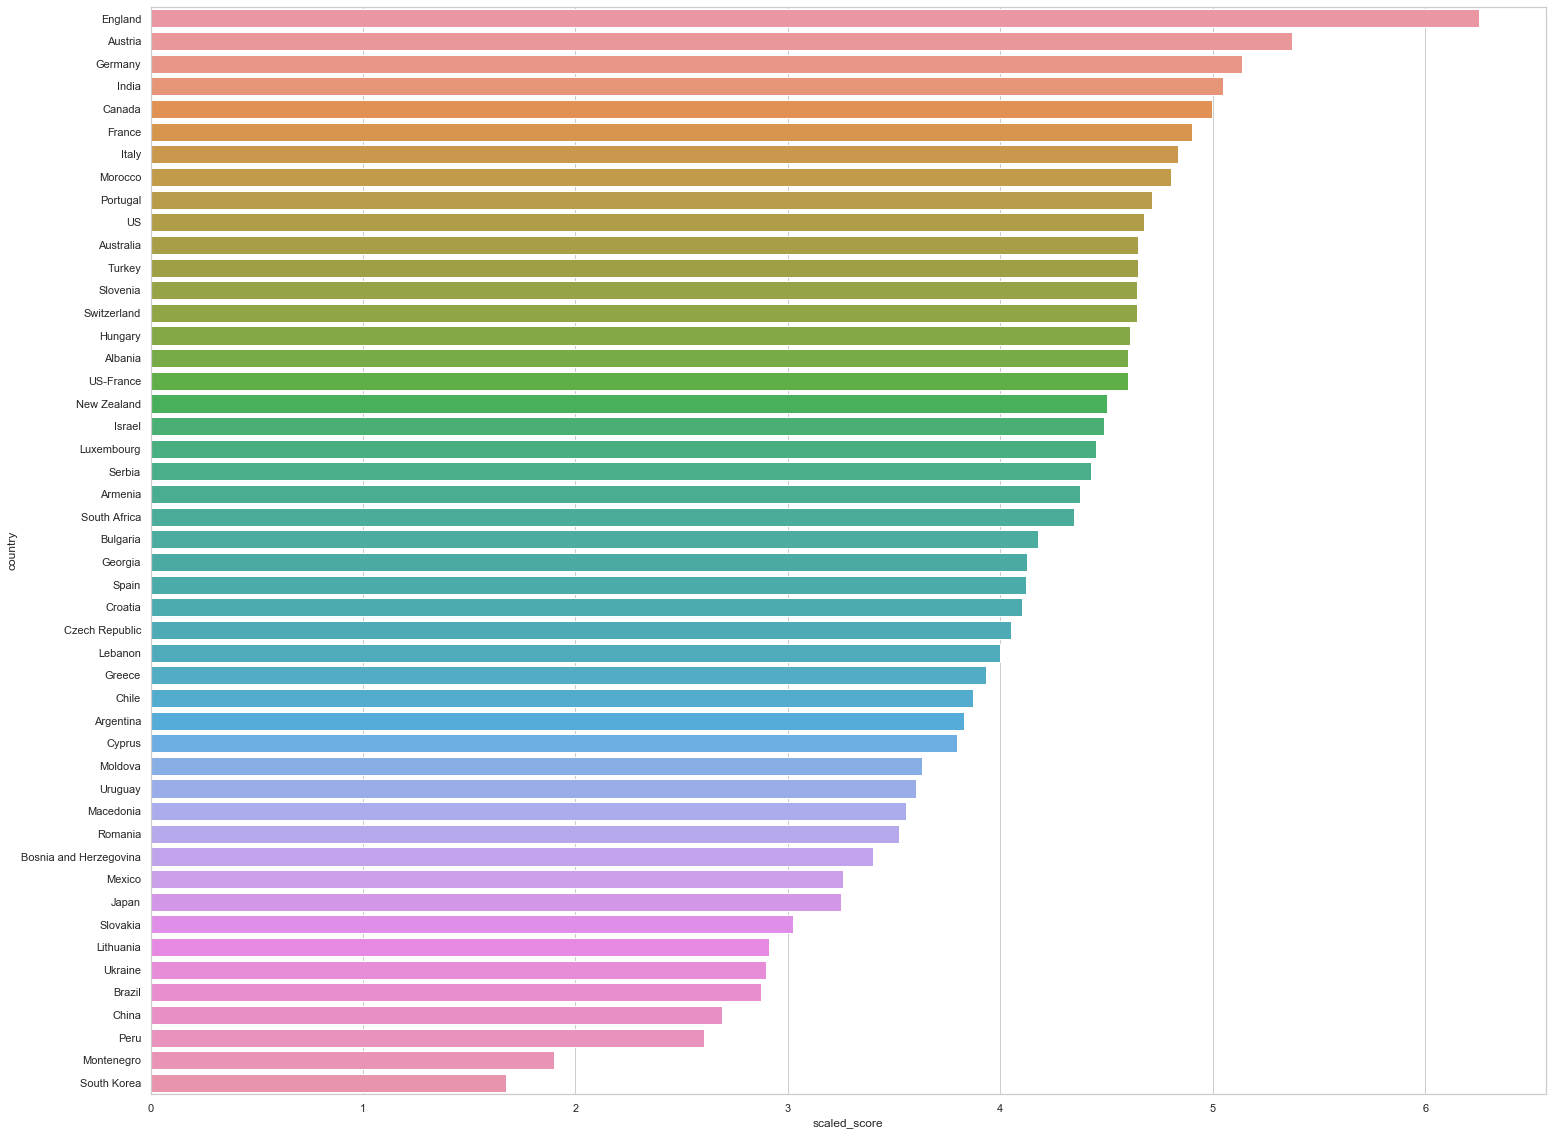

In [14]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,20))
countries_data = countries_data.sort_values(by = 'scaled_score', ascending=False)
sns.barplot(x="scaled_score", y='country', data=countries_data, ci="sd")

#### Average Price per Bottle by Country

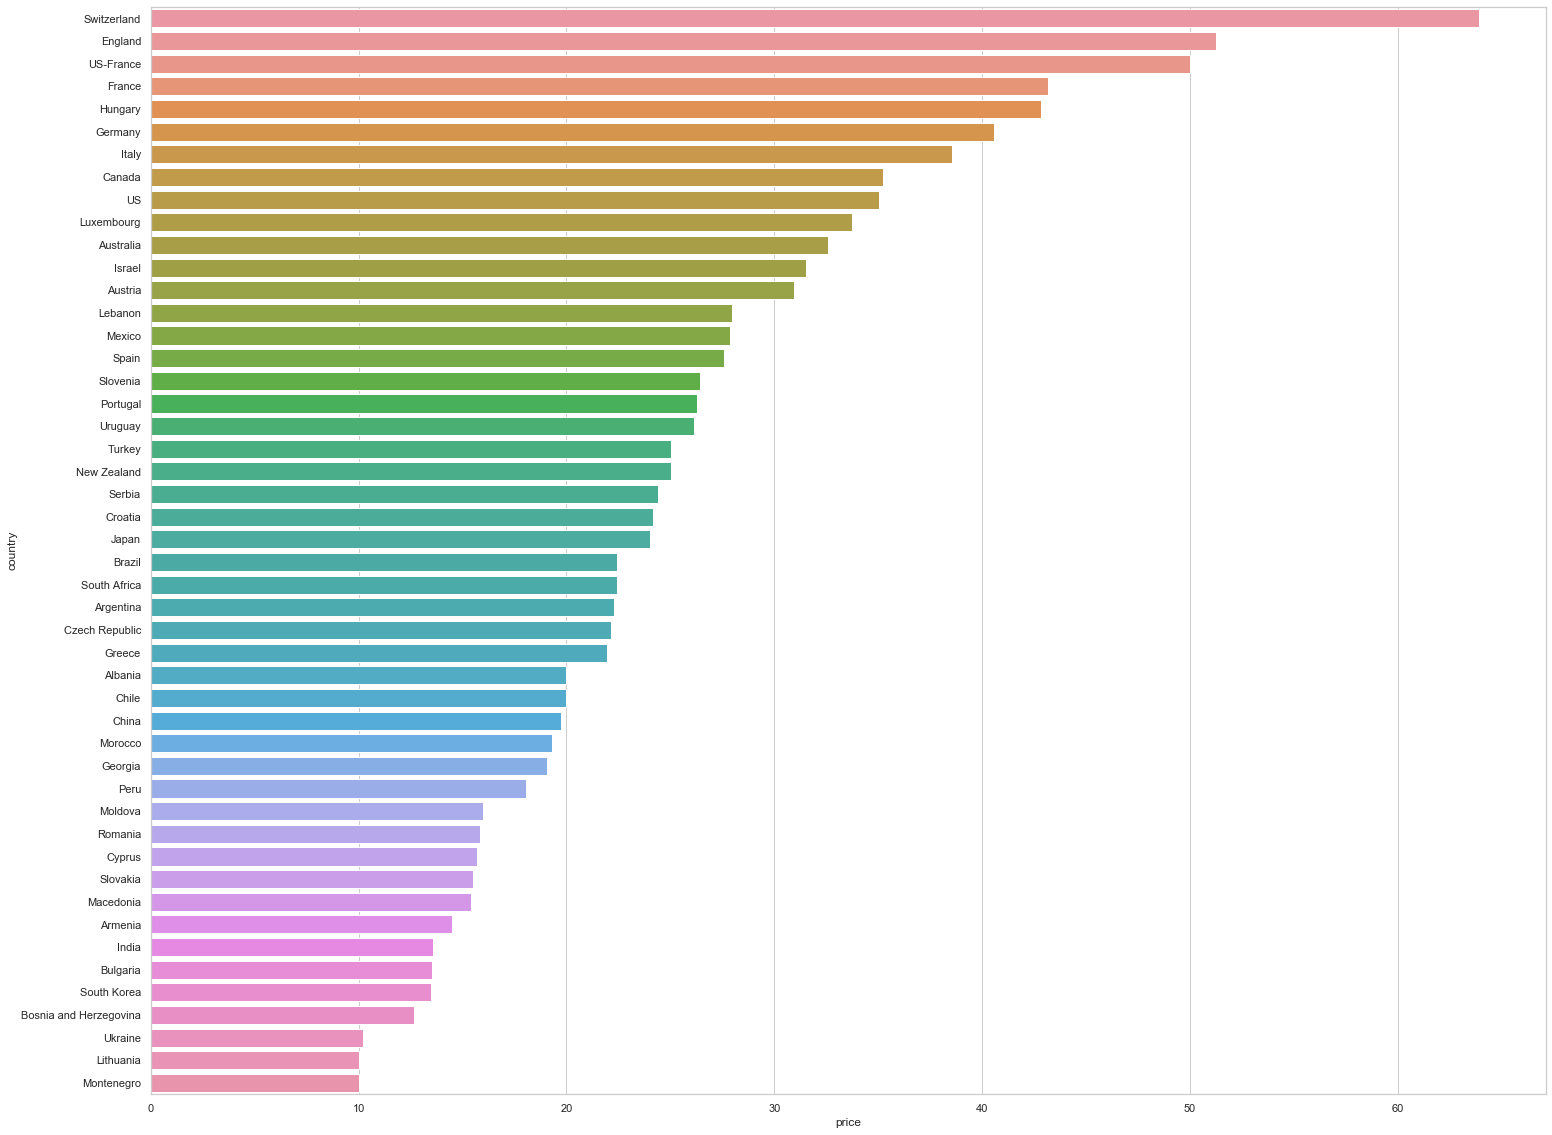

In [15]:
sns.set(style="whitegrid")
plt.figure(figsize=(25,20))
countries_data = countries_data.sort_values(by = 'price', ascending=False)
sns.barplot(x="price", y='country', data=countries_data, ci="sd")

#### Price per one review unit (from scaled score) by Country

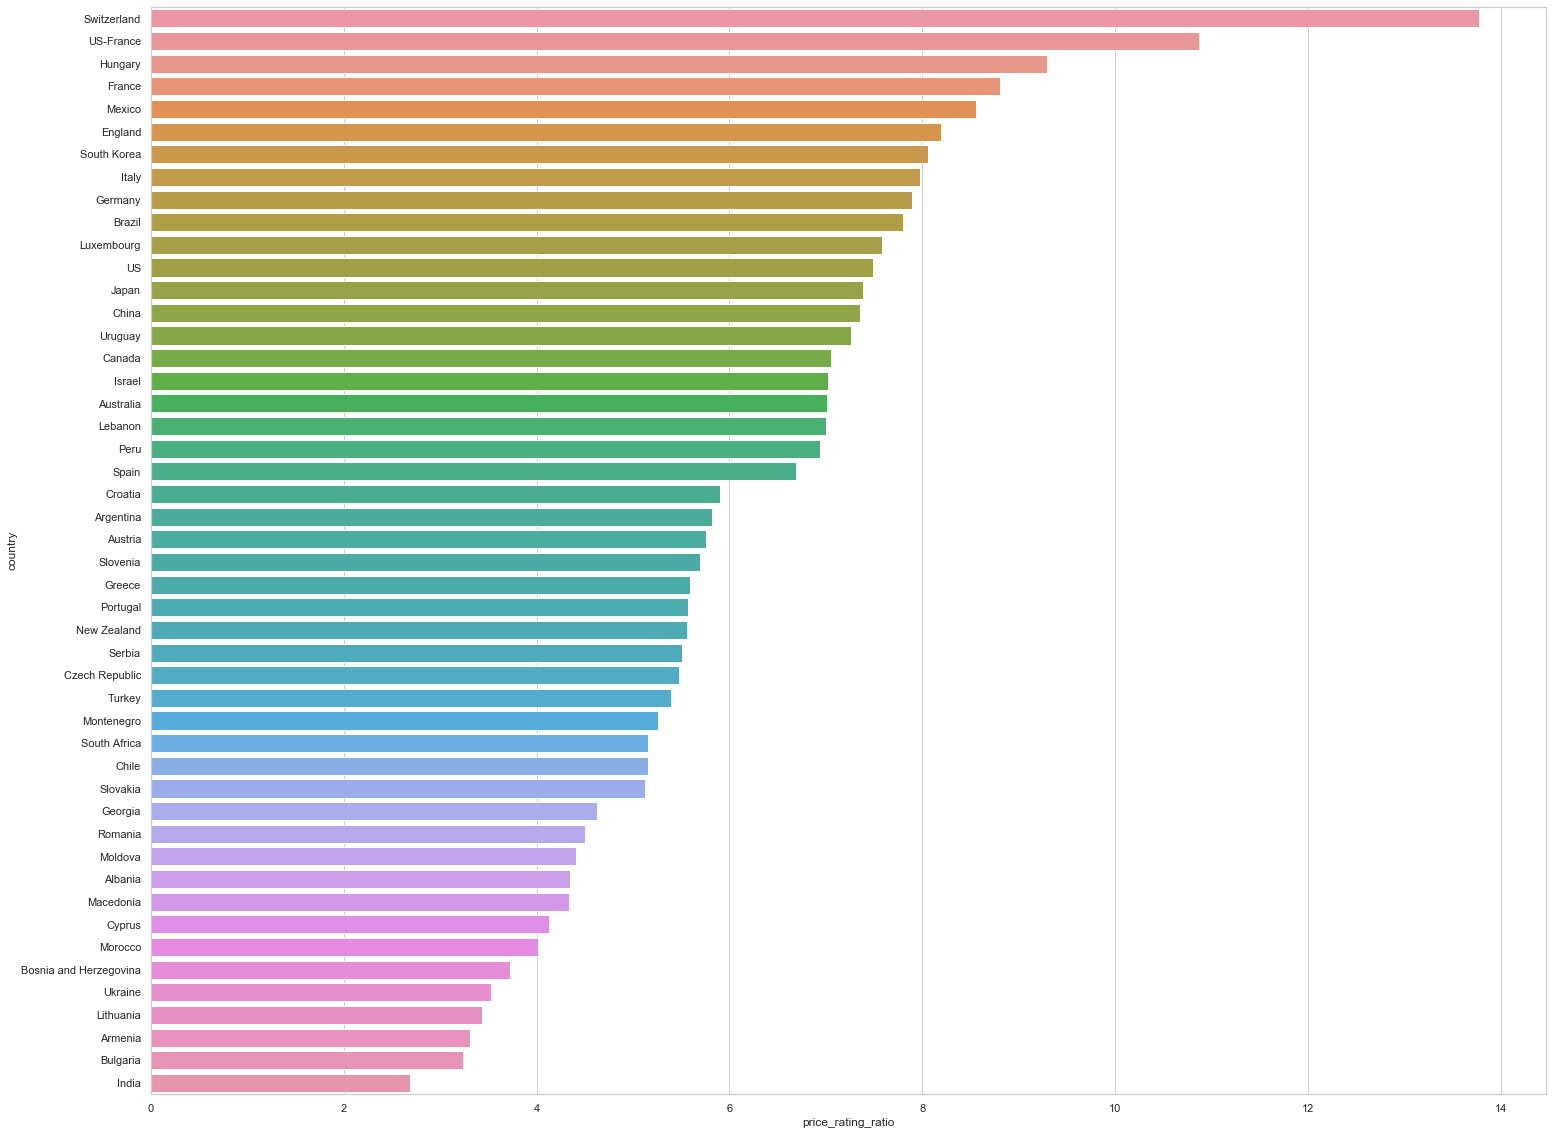

In [16]:
countries_data['price_rating_ratio'] = countries_data.price / countries_data.scaled_score
sns.set(style="whitegrid")
plt.figure(figsize=(25,20))
countries_data = countries_data.sort_values(by = 'price_rating_ratio', ascending=False)
sns.barplot(x="price_rating_ratio", y='country', data=countries_data, ci="sd")

#### Price by Different Varieties

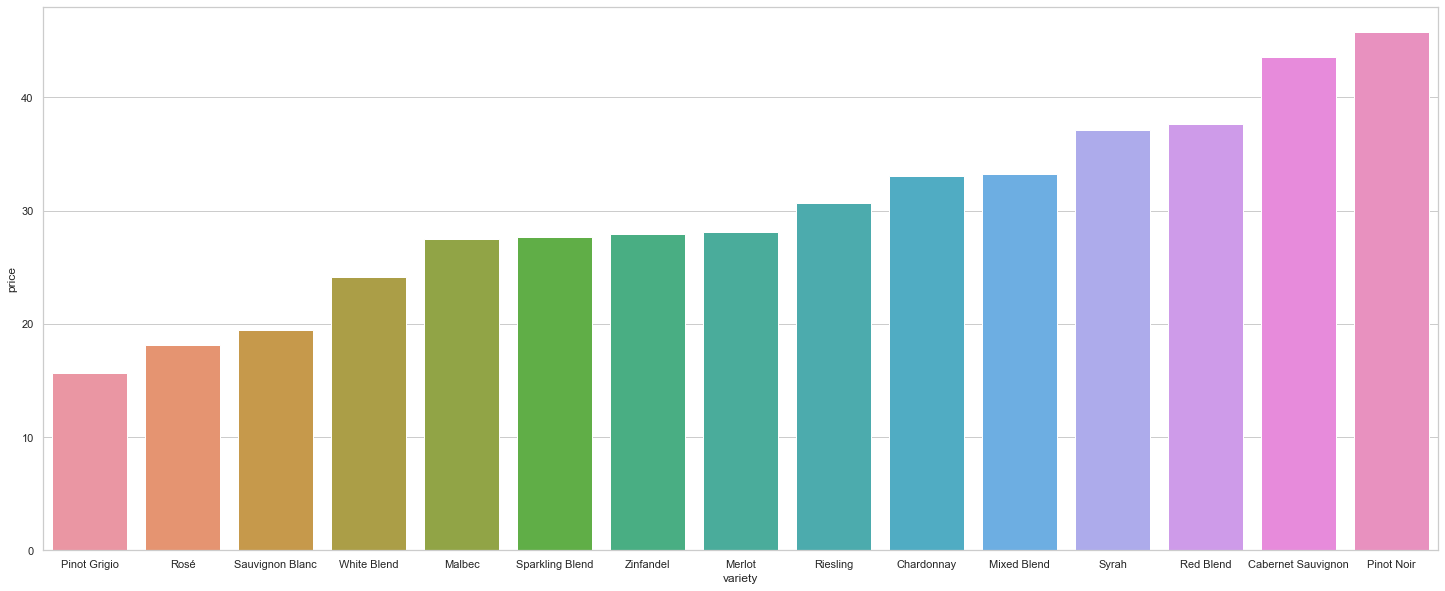

In [17]:
plt.figure(figsize=(25,10))
variety_mean = df.groupby('variety')['price'].mean().sort_values(ascending=True)
variety_mean = variety_mean.reset_index()
sns.barplot(x="variety", y="price", data=variety_mean)  # RUN PLOT 

### Discerning Accuracy of Hypothesis

In this section, we will attempt to accurately plot the relationship between wine price and WineEnthusiast score. To do this, we will have to categorize prices into roughly 10 categories, and then create boxplots of each price range.

#### More Data Cleaning

In [18]:
prices = df.drop(['variety', 'country', 'score', 'winery', 'from Twitter?', 'province'], axis = 1)
prices

,price,scaled_score
0,235.0,8.20
1,110.0,8.20
2,90.0,8.20
3,65.0,8.20
4,66.0,7.75
...,...,...
280896,28.0,5.50
280897,75.0,5.50
280898,30.0,5.50
280899,32.0,5.50


#### Categorize the Prices

In [19]:
over100 = prices.loc[prices['price'] >= 100]
under100 = prices.loc[prices['price'] < 100]
under80 = prices.loc[prices['price'] < 80]
under70 = prices.loc[prices['price'] < 70]
under60 = prices.loc[prices['price'] < 60]
under50 = prices.loc[prices['price'] < 50]
under40 = prices.loc[prices['price'] < 40]
under30 = prices.loc[prices['price'] < 30]
under20 = prices.loc[prices['price'] < 20]



p80to100 = under100.loc[under100['price'] >= 80]
p70to80 = under80.loc[under80['price'] >= 70]
p60to70 = under70.loc[under70['price'] >= 60]
p50to60 = under60.loc[under60['price'] >= 50]
p40to50 = under50.loc[under50['price'] >= 40]
p30to40 = under40.loc[under40['price'] >= 30]
p20to30 = under30.loc[under30['price'] >= 20]
p10to20 = under20.loc[under20['price'] >= 10]
p0to10 = prices.loc[prices['price'] < 10]

over100 = over100.assign(price_range='>=100')
p80to100 = p80to100.assign(price_range='[80,100)')
p70to80 = p70to80.assign(price_range='[70,80)')
p60to70 = p60to70.assign(price_range='[60,70)')
p50to60 = p50to60.assign(price_range='[50,60)')
p40to50 = p40to50.assign(price_range='[40,50)')
p30to40 = p30to40.assign(price_range='[30,40)')
p20to30 = p20to30.assign(price_range='[20,30)')
p10to20 = p10to20.assign(price_range='[10,20)')
p0to10 = p0to10.assign(price_range='<10')

ranges = [p0to10, p10to20, p20to30, p30to40, p40to50, p50to60, p60to70, p70to80, p80to100, over100]
prices_with_ranges = pd.concat(ranges)
prices_with_ranges

,price,scaled_score,price_range
119,7.0,3.70,<10
247,9.0,4.60,<10
726,9.0,3.25,<10
730,9.0,3.25,<10
748,9.0,3.25,<10
...,...,...,...
280741,100.0,5.05,>=100
280748,115.0,5.05,>=100
280821,100.0,5.95,>=100
280849,105.0,5.95,>=100


#### Plot the Trend: WineEnthusiast Scaled Score by Price

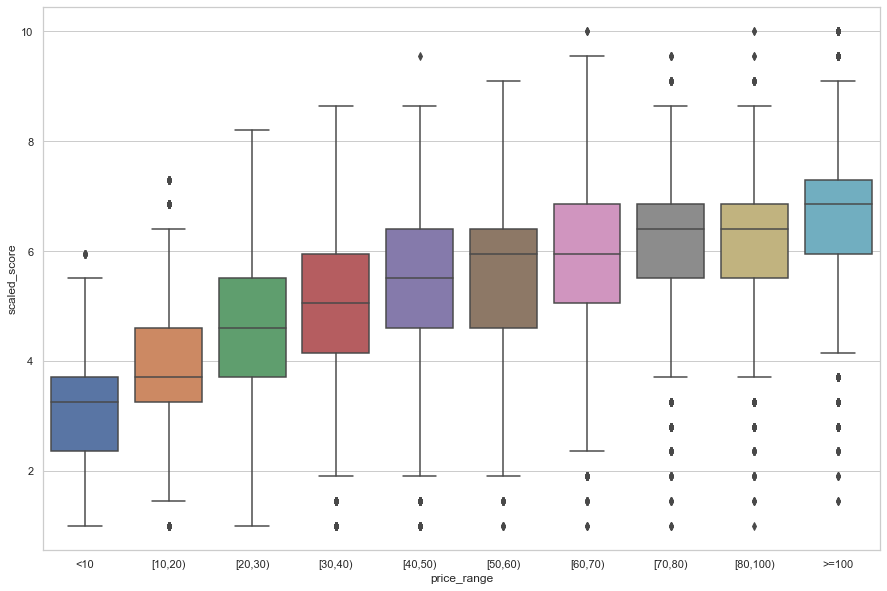

In [20]:
sns.set(style="whitegrid")
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="price_range", y="scaled_score", data=prices_with_ranges)

## Machine Learning Model

In [21]:
#yukti

In [22]:
dataset = df[['price','variety','scaled_score']]
dataset

,price,variety,scaled_score
0,235.0,Cabernet Sauvignon,8.20
1,110.0,Mixed Blend,8.20
2,90.0,Sauvignon Blanc,8.20
3,65.0,Pinot Noir,8.20
4,66.0,Red Blend,7.75
...,...,...,...
280896,28.0,Riesling,5.50
280897,75.0,Pinot Noir,5.50
280898,30.0,Mixed Blend,5.50
280899,32.0,Mixed Blend,5.50


In [23]:
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, 2].values

In [26]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:, 1] = labelencoder.fit_transform(X[:, 1])
onehotencoder = OneHotEncoder(categories='auto')
X = onehotencoder.fit_transform(X).toarray()

In [27]:
X = X[:, 1:]

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [ ]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

In [ ]:
y_pred = regressor.predict(X_test)

In [ ]:
regressor.score(X,y)

# Ethics & Privacy

*Fill in your ethics & privacy discussion here*

# Conclusion & Discussion

*Fill in your discussion information here*

# Team Contributions

*Specify who in your group worked on which parts of the project.*